In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd 
import math
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
plt.rcParams['figure.figsize'] = (7, 7)
# pd.set_option('display.height', 100)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("./back/eventinfo.virtual_stack.all.feb18.csv",sep=" ")


In [3]:
df['ivs'] = df.index


In [4]:
df.head()

,ivs,EQ_NAME,EQ_LAT,EQ_LON,EQ_RADIUS,VS_STA_LAT,VS_STA_LON,STA_RADIUS,record_num,dist,onset,tstar_ccc,tstar_factor,gau_ccc,gau_factor,quality,ave_SNR_records,VS_SNR_stack,VS_SNR_peak,misfit,misfit_pre,misfit_post,stretch_ccc,stretch_coeff,polarity,EQ_DEP,PREM,PHASE,ONSET,ENDSET,ONE_PERIOD,VS_SNR_peak_trough,traffic_nearby,PICK
0,0,201301151609,-62.57,-161.43,5.0,-26.94,25.39,5.0,3,90.48,18.9,0.92,27.35,0.99,41.15,-1.0,1.84,1.19,0.74,0.47,0.27,0.57,0.88,1.87,0.01,10.0,2015.09,S3,18.9,42.1,23.2,0.00,0.0,-1
1,1,201301151609,-62.60,-161.40,5.0,-19.24,21.87,5.0,10,98.29,-24.7,0.89,11.27,0.99,43.25,-1.0,1.15,1.80,1.65,0.13,0.16,0.38,0.99,1.97,0.06,10.0,2135.91,S3,-24.7,-0.5,24.2,0.99,0.0,-1
2,2,201301151609,-62.60,-161.40,5.0,-19.65,23.70,5.0,17,97.82,11.6,0.94,8.89,0.99,33.45,-1.0,1.42,3.12,1.98,0.13,0.56,0.26,0.97,1.52,0.03,10.0,2128.70,S3,11.6,30.4,18.8,0.09,0.0,-1
3,3,201301151609,-62.57,-161.43,5.0,-17.31,34.78,5.0,5,99.27,3.4,0.93,1.34,0.99,23.95,-1.0,1.21,0.41,0.19,0.16,0.54,0.76,0.95,1.09,-0.14,10.0,2151.09,S3,3.4,16.8,13.4,0.30,0.0,-1
4,4,201301151609,-62.57,-161.43,5.0,-18.85,46.98,5.0,13,95.71,6.4,0.82,0.03,1.00,12.15,-1.0,2.05,3.27,2.05,0.22,0.59,1.44,0.94,0.55,-0.28,10.0,2096.12,S3,6.4,13.2,6.8,2.83,0.0,-1


In [5]:
df['record_num'].sum()

3961572

In [7]:
df['PHASE'].unique()

array(['S3', 'ScS', 'ScSScS', 'Sdiff', 'S', 'SS', 'ScS3m', 'SSm', 'S3m',
       'ScS4m', 'S5m', 'S6m', 'ScS4', 'S4m', 'ScS5m', 'ScS5', 'ScS3',
       'S4', 'S5'], dtype=object)

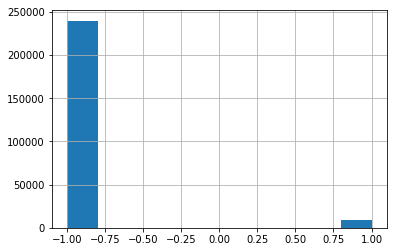

In [7]:
df['PICK'].hist()

In [5]:
[x for x in df.columns]

['ivs',
 'EQ_NAME',
 'EQ_LAT',
 'EQ_LON',
 'EQ_RADIUS',
 'VS_STA_LAT',
 'VS_STA_LON',
 'STA_RADIUS',
 'record_num',
 'dist',
 'onset',
 'tstar_ccc',
 'tstar_factor',
 'gau_ccc',
 'gau_factor',
 'quality',
 'ave_SNR_records',
 'VS_SNR_stack',
 'VS_SNR_peak',
 'misfit',
 'misfit_pre',
 'misfit_post',
 'stretch_ccc',
 'stretch_coeff',
 'polarity',
 'EQ_DEP',
 'PREM',
 'PHASE',
 'ONSET',
 'ENDSET',
 'ONE_PERIOD',
 'VS_SNR_peak_trough',
 'traffic_nearby',
 'PICK']

In [6]:
new_col = ['ivs',
 'EQ_NAME',
 'EQ_LAT',
 'EQ_LON',
 'EQ_RADIUS',
 'VS_STA_LAT',
 'VS_STA_LON',
 'STA_RADIUS',
 'RECORD_NUM',
 'DIST',
 'ONSET',
 'TSTAR_C',
 'TSTAR_F',
 'GAU_C',
 'GAU_F',
 'QUALITY',
 'SNR_AVE_RECORD',
 'SNR_VS_STACK',
 'SNR_VS_PEAK',
 'MISFIT',
 'MISFITPRE',
 'MISFITPOST',
 'STRETCH_C',
 'STRETCH_F',
 'POLARITY',
 'EQ_DEP',
 'PREM',
 'PHASE',
 'ONSET',
 'ENDSET',
 'ONE_PERIOD',
 'SNR_VS_PEAK_TROUGH',
 'TRAFFIC',
 'PICK']

In [7]:
df.columns = new_col
df.head()

,ivs,EQ_NAME,EQ_LAT,EQ_LON,EQ_RADIUS,VS_STA_LAT,VS_STA_LON,STA_RADIUS,RECORD_NUM,DIST,ONSET,TSTAR_C,TSTAR_F,GAU_C,GAU_F,QUALITY,SNR_AVE_RECORD,SNR_VS_STACK,SNR_VS_PEAK,MISFIT,MISFITPRE,MISFITPOST,STRETCH_C,STRETCH_F,POLARITY,EQ_DEP,PREM,PHASE,ONSET,ENDSET,ONE_PERIOD,SNR_VS_PEAK_TROUGH,TRAFFIC,PICK
0,0,201301151609,-62.57,-161.43,5.0,-26.94,25.39,5.0,3,90.48,18.9,0.92,27.35,0.99,41.15,-1.0,1.84,1.19,0.74,0.47,0.27,0.57,0.88,1.87,0.01,10.0,2015.09,S3,18.9,42.1,23.2,0.00,0.0,-1
1,1,201301151609,-62.60,-161.40,5.0,-19.24,21.87,5.0,10,98.29,-24.7,0.89,11.27,0.99,43.25,-1.0,1.15,1.80,1.65,0.13,0.16,0.38,0.99,1.97,0.06,10.0,2135.91,S3,-24.7,-0.5,24.2,0.99,0.0,-1
2,2,201301151609,-62.60,-161.40,5.0,-19.65,23.70,5.0,17,97.82,11.6,0.94,8.89,0.99,33.45,-1.0,1.42,3.12,1.98,0.13,0.56,0.26,0.97,1.52,0.03,10.0,2128.70,S3,11.6,30.4,18.8,0.09,0.0,-1
3,3,201301151609,-62.57,-161.43,5.0,-17.31,34.78,5.0,5,99.27,3.4,0.93,1.34,0.99,23.95,-1.0,1.21,0.41,0.19,0.16,0.54,0.76,0.95,1.09,-0.14,10.0,2151.09,S3,3.4,16.8,13.4,0.30,0.0,-1
4,4,201301151609,-62.57,-161.43,5.0,-18.85,46.98,5.0,13,95.71,6.4,0.82,0.03,1.00,12.15,-1.0,2.05,3.27,2.05,0.22,0.59,1.44,0.94,0.55,-0.28,10.0,2096.12,S3,6.4,13.2,6.8,2.83,0.0,-1


In [8]:
df_orig = pd.read_csv('../EWTTime/eventinfo.comprehensive.6phase.june28.csv')
df_orig['ORIG_TIME'] = df_orig['ORIG_TIME'].astype(str)
# df_orig.columns
wanted_col = ['EQ_LAT','EQ_LON','EQ_DEP','EQ_MAG','EW_GAU','ORIG_TIME']
df_orig = df_orig[wanted_col]
df_orig['EQ_NAME'] = df_orig['ORIG_TIME'].str.slice(0,12).astype(int)
df_orig.head()

,EQ_LAT,EQ_LON,EQ_DEP,EQ_MAG,EW_GAU,ORIG_TIME,EQ_NAME
0,-13.339,-69.446,596.0,6.9,20.7,19940110155350.76,199401101553
1,-13.339,-69.446,596.0,6.9,20.7,19940110155350.76,199401101553
2,-13.339,-69.446,596.0,6.9,20.7,19940110155350.76,199401101553
3,-13.339,-69.446,596.0,6.9,20.7,19940110155350.76,199401101553
4,-13.339,-69.446,596.0,6.9,20.7,19940110155350.76,199401101553


In [9]:
df_orig = df_orig.drop_duplicates(subset=['EQ_NAME'],keep='first')
df_orig.shape

(360, 7)

In [10]:
df.drop(['EQ_LAT','EQ_LON','EQ_DEP'],inplace=True,axis=1)
df.head()

,ivs,EQ_NAME,EQ_RADIUS,VS_STA_LAT,VS_STA_LON,STA_RADIUS,RECORD_NUM,DIST,ONSET,TSTAR_C,TSTAR_F,GAU_C,GAU_F,QUALITY,SNR_AVE_RECORD,SNR_VS_STACK,SNR_VS_PEAK,MISFIT,MISFITPRE,MISFITPOST,STRETCH_C,STRETCH_F,POLARITY,PREM,PHASE,ONSET,ENDSET,ONE_PERIOD,SNR_VS_PEAK_TROUGH,TRAFFIC,PICK
0,0,201301151609,5.0,-26.94,25.39,5.0,3,90.48,18.9,0.92,27.35,0.99,41.15,-1.0,1.84,1.19,0.74,0.47,0.27,0.57,0.88,1.87,0.01,2015.09,S3,18.9,42.1,23.2,0.00,0.0,-1
1,1,201301151609,5.0,-19.24,21.87,5.0,10,98.29,-24.7,0.89,11.27,0.99,43.25,-1.0,1.15,1.80,1.65,0.13,0.16,0.38,0.99,1.97,0.06,2135.91,S3,-24.7,-0.5,24.2,0.99,0.0,-1
2,2,201301151609,5.0,-19.65,23.70,5.0,17,97.82,11.6,0.94,8.89,0.99,33.45,-1.0,1.42,3.12,1.98,0.13,0.56,0.26,0.97,1.52,0.03,2128.70,S3,11.6,30.4,18.8,0.09,0.0,-1
3,3,201301151609,5.0,-17.31,34.78,5.0,5,99.27,3.4,0.93,1.34,0.99,23.95,-1.0,1.21,0.41,0.19,0.16,0.54,0.76,0.95,1.09,-0.14,2151.09,S3,3.4,16.8,13.4,0.30,0.0,-1
4,4,201301151609,5.0,-18.85,46.98,5.0,13,95.71,6.4,0.82,0.03,1.00,12.15,-1.0,2.05,3.27,2.05,0.22,0.59,1.44,0.94,0.55,-0.28,2096.12,S3,6.4,13.2,6.8,2.83,0.0,-1


In [11]:

df_out = df.merge(df_orig,on='EQ_NAME',how='left')

In [12]:
print(df.shape,df_out.shape)

(248657, 31) (248657, 37)


In [13]:
# [['EQ_LAT','EQ_LON']]

def get_AZ(lat1,lon1,lat2,lon2):
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    dlat = dlat / 180 * np.pi
    dlon = dlon / 180 * np.pi
    lat1 = lat1/ 180 * np.pi
    lon1 = lon1/180*np.pi
    lat2 = lat2/180*np.pi
    lon2 = lon2/180*np.pi
    R = 6371
    az = np.arctan2( (np.sin(dlon) * np.cos(dlat)), np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2)* np.cos(dlon)) 
    az = az / np.pi * 180
    if az < 0:
        az = az + 360
    return az
df_out['AZ'] = df_out.apply(lambda x: get_AZ(x['EQ_LAT'],x['EQ_LON'],x['VS_STA_LAT'],x['VS_STA_LON']),axis=1)
# df_out['AZ']

In [14]:
# Add BAZ
df_out['BAZ'] = 360 - df_out['AZ']

In [15]:
# Add Gaussian Misfit
# calculate the GAU_MISFIT, it is defined by:
# 1. calculate value difference on each point
# 2. sum all value difference
# 3. average based on npts of [ENDSET - ONSET]*10
def gaussian_function(amplitude, average, std, value):
    return amplitude*np.exp( -1* (value - average)*(value - average)/2/std/std)

def get_gau_misfit( gau1, gau2,  ONSET,  ENDSET):
    # gau1 is record gau
    # gau2 is EW gau
    T = ENDSET - ONSET
    T = T.values[0]
    if gau1 < 5:
        gau1 = 20
    if gau2 < 5:
        gau2 = 20
#     print(T)
    if T < 5:
        T = 10
    npts_t = (int)(T*10)
    npts_beg = -0.5*npts_t
    
    sum_gau = 0
    for i in range(npts_t):
        g1 = gaussian_function(1,0,gau1,npts_beg + i)
        g2 = gaussian_function(1,0,gau2,npts_beg + i)
        sum_gau = sum_gau + g1 - g2
    
    gau_misfit = sum_gau / npts_t
    
    return gau_misfit

# get_gau_misfit(20.04,31.1,0,8.79)

In [16]:
df_out['GAU_MISFIT'] = df_out.apply(lambda x: get_gau_misfit(x['GAU_F'],x['EW_GAU'],x['ONSET'],x['ENDSET']),axis=1)

In [17]:
# add w_comprehensive
def get_w_comprehensive(SNR,CCC,misfitpre,misfitpost,misfit_sig):
    wSNR = 1
    wCCC = 1
    wpre = 1
    wpost = 1
    wsig = 1
    
    if SNR <2:
        wSNR = 0.5
    elif SNR < 4:
        wSNR = (1-0.5)/3 * (SNR - 2) + 0.5
    else:
        wSNR = 1.0
    
    if CCC < 0.92:
        wCCC = 0.5
    elif CCC < 0.98:
        wCCC = (1-0.5)/0.06 * (CCC - 0.92) + 0.5
    else:
        wCCC = 1    
        
    if misfit_sig<0.05:
        wsig = 1
    elif misfit_sig < 0.3:
        wsig = (0.5-1.0)/(0.3-0.05)* (misfit_sig - 0.05) + 1.0
    else:
        wsig = 0.5
        
    if misfitpre < 0.1:
        wpre = 1
    elif misfitpre < 0.2:
        wpre = (0.5-1.0)/(0.2-0.1)*(misfitpre - 0.1) + 1.0
    else:
        wpre = 0.5
        
    if misfitpost < 0.5:
        wpost = 1.0
    elif misfitpost < 1.0:
        wpost = (0.2-1.0)/(1.0-0.5)*(misfitpost - 0.5) + 1.0
    else:
        wpost = 0.2
        
    weight = wSNR * wCCC * wpre * wpost * wsig
    return weight

# get_w_comprehensive(3,0.98,0.05,0.5,0.1)

In [18]:
df_out['W_COMPREHENSIVE'] = df_out.apply(lambda x: get_w_comprehensive(x['SNR_VS_STACK'],x['TSTAR_C'],x['MISFITPRE'],
                                                                      x['MISFITPOST'],x['MISFIT']),axis=1)

In [19]:
# Add ONSET ENDSET

In [21]:
df_out = df_out.loc[:,~df_out.columns.duplicated()]
df_out['DT'] = df_out['ONSET']
# df_out.drop_duplicates(['ONSET'],keep='first',inplace=True)
# df_out['ONSET']
# df_out = df_out.loc[:,~df_out.columns.duplicated()]
# df_out['ONSET']
# df_out['DT']

In [22]:
def gaussian_function(amplitude, average, std, value):
    return amplitude*np.exp( -1* (value - average)*(value - average)/2/std/std)

def get_gau_inc( gau):
    if gau < 5:
        gau = 20
    
    p1 = 0
    p2 = 0
    for i in range(10000):
        index = i*0.1
        amp = gaussian_function(1,0,gau, index)
        if amp < 0.1:
            p1 = i
            break
    for i in range(10000):
        index = i*0.1
        amp = gaussian_function(1,0,gau, index)
#         print(amp)
        if amp < 0.02:
            p2 = i
            break
    return [p1*0.01,p2*0.01]
# get_gau_inc(18)
P = df_out['GAU_F'].apply(lambda x: get_gau_inc(x))

In [23]:
p1 =[]
p2 = []
p3 = []
for i,j in P:
    p1.append(i)
    p2.append(j)
    p3.append(j-i)

In [24]:
# df_out[['ONSET','ENDSET']]
# df_out['ENDSET'] - df_out['ONSET']
df_out['ONSET'] = df_out['DT'] + p3

Series([], Name: ONSET, dtype: float64)


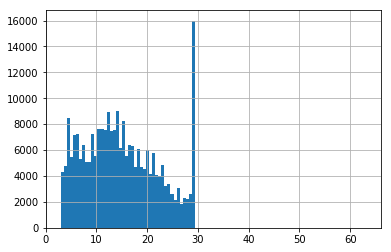

In [28]:
 
df_out.loc[df_out['ONSET'] + 3 > df_out['ENDSET'],'ONSET'] -= 3
print(df_out.loc[df_out['ONSET'] + 3 > df_out['ENDSET'],'ONSET'])
df_out['PERIOD'] = df_out['ENDSET'] - df_out['ONSET']
df_out['PERIOD'].hist(bins=100)

In [31]:
# plt.scatter(df_out['STRETCH_F'],df_out['PERIOD'],s=0.1)

In [32]:
save_col = ['ivs',
'DIST',
'RECORD_NUM',
'VS_STA_LAT',
'VS_STA_LON',
'EQ_LAT',
'EQ_LON',

'EQ_DEP',
'EQ_MAG',

'ORIG_TIME',
'AZ',
'BAZ',
'PHASE',
'DT',
'PREM',
'ONSET',
'ENDSET',
'SNR_VS_STACK',
'SNR_AVE_RECORD',
'SNR_VS_PEAK_TROUGH',
'MISFIT',
'MISFITPRE',
'MISFITPOST',
'TSTAR_F',
'STRETCH_F',
'TSTAR_C',
'GAU_C',
'EW_GAU',
'GAU_F',
'GAU_MISFIT',
'W_COMPREHENSIVE',
'TRAFFIC',
'PERIOD',
'POLARITY',
'QUALITY',
'PICK',
            ]


In [33]:
df_save = df_out[save_col]

In [34]:
df_save.to_csv('./eventinfo.multi_phase.feb17.csv',index=False)

In [35]:
df_save.shape

(248657, 36)

In [36]:
df_out.shape

(248657, 42)